/usr/local/lib/python3.12/dist-packages/keras/src/layers/layer.py:421: UserWarning: `build()` was called on layer 'tinn_identification_net_2', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


It 00000: loss = 2.22095146e+01 drift1 = 1.35005820e+00 beta = 1.27695668e+00 sigma0 = 1.04999340e+00 sigma1 = 9.50001299e-01 sigma2 = 9.50000525e-01 t0 = 1.85563952e-01
It 00050: loss = 2.88616014e+00 drift1 = 1.66753232e+00 beta = 6.13197565e-01 sigma0 = 9.71796215e-01 sigma1 = 1.37044120e+00 sigma2 = 1.46919882e+00 t0 = 2.13235185e-01
It 00100: loss = 1.11015594e+00 drift1 = 1.81255341e+00 beta = 5.60807109e-01 sigma0 = 1.37171650e+00 sigma1 = 1.57305086e+00 sigma2 = 1.60039663e+00 t0 = 2.33630329e-01
It 00150: loss = 8.75763953e-01 drift1 = 1.82444477e+00 beta = 5.58313847e-01 sigma0 = 1.57854521e+00 sigma1 = 1.67455375e+00 sigma2 = 1.69652772e+00 t0 = 2.38261715e-01
It 00200: loss = 4.46747541e-01 drift1 = 1.82627702e+00 beta = 5.60617447e-01 sigma0 = 1.59115672e+00 sigma1 = 1.73084784e+00 sigma2 = 1.72612786e+00 t0 = 2.40594789e-01
It 00250: loss = 4.87142354e-01 drift1 = 1.83655453e+00 beta = 5.62735379e-01 sigma0 = 1.60729778e+00 sigma1 = 1.70462823e+00 sigma2 = 1.67905438e+00 

/tmp/ipython-input-3116356576.py:645: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  F1.append(np.trapz(np.array(J1[:ii]), x=np.reshape(tspace1,(len(J1),1))[:ii], axis=0))
/tmp/ipython-input-3116356576.py:646: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  F1_d.append(np.trapz(np.array(J1_d[:ii]), x=np.reshape(tspace1,(len(J1),1))[:ii], axis=0))
/tmp/ipython-input-3116356576.py:653: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  F2.append(np.trapz(np.array(-J2[:ii]), x=np.reshape(tspace2,(len(J2),1))[:ii], axis=0))
/tmp/ipython-input-3116356576.py:654: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  F2_d.append(np.trapz(np.array(

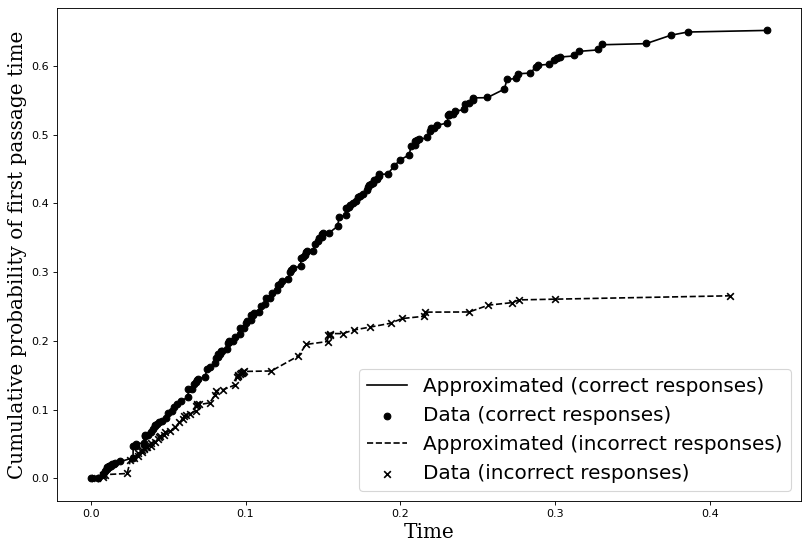

/tmp/ipython-input-3116356576.py:678: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  F3.append(np.trapz(np.array(J3[:ii]), x=np.reshape(tspace3,(len(J3),1))[:ii], axis=0))
/tmp/ipython-input-3116356576.py:679: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  F3_d.append(np.trapz(np.array(J3_d[:ii]), x=np.reshape(tspace3,(len(J3),1))[:ii], axis=0))
/tmp/ipython-input-3116356576.py:686: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  F4.append(np.trapz(np.array(-J4[:ii]), x=np.reshape(tspace4,(len(J4),1))[:ii], axis=0))
/tmp/ipython-input-3116356576.py:687: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  F4_d.append(np.trapz(np.array(

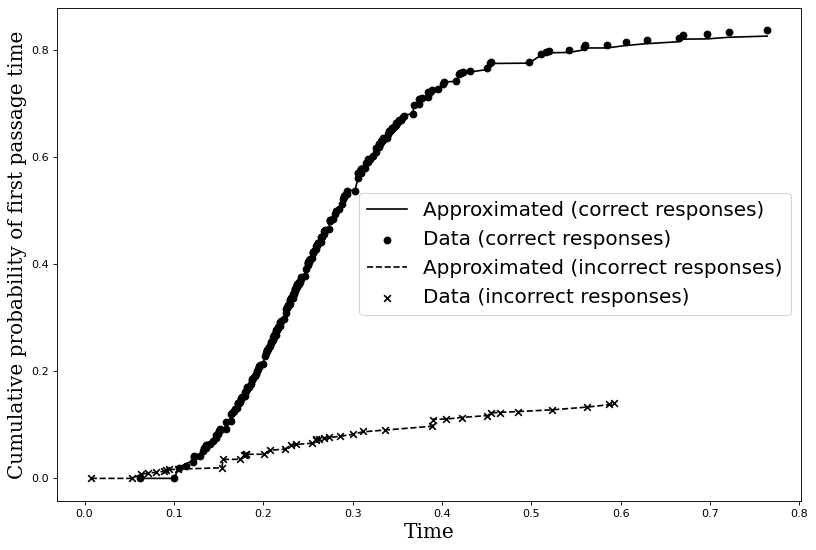

/tmp/ipython-input-3116356576.py:712: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  F5.append(np.trapz(np.array(J5[:ii]), x=np.reshape(tspace5,(len(J5),1))[:ii], axis=0))
/tmp/ipython-input-3116356576.py:713: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  F5_d.append(np.trapz(np.array(J5_d[:ii]), x=np.reshape(tspace5,(len(J5),1))[:ii], axis=0))
/tmp/ipython-input-3116356576.py:720: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  F6.append(np.trapz(np.array(-J6[:ii]), x=np.reshape(tspace6,(len(J6),1))[:ii], axis=0))
/tmp/ipython-input-3116356576.py:721: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  F6_d.append(np.trapz(np.array(

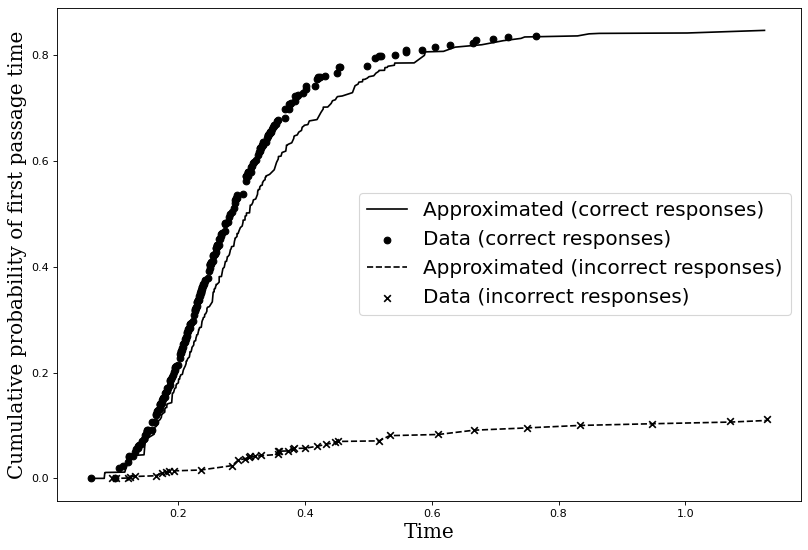

In [6]:
import pyreadr
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from time import time
from mpl_toolkits.mplot3d import Axes3D
import scipy.optimize
from scipy.stats import gaussian_kde
from scipy.optimize import minimize

result = pyreadr.read_r('/content/drive/My Drive/FDBNCRW2008.RData')
data = result["data"]
subj = np.unique(data.subj)

for i in range(subj.shape[0]):
    RT = []
    for cond in ['speed', 'neutral', 'accuracy']:
        sub_data = data.loc[(data.subj == subj[i]) & (data.instruction == cond)]
        RT.append(list(sub_data.loc[sub_data.correct == True].RT))
        RT.append(list(sub_data.loc[sub_data.correct == False].RT))
    rt1 = np.sort(RT[0])
    rt2 = np.sort(RT[1])
    rt3 = np.sort(RT[2])
    rt4 = np.sort(RT[3])
    rt5 = np.sort(RT[4])
    rt6 = np.sort(RT[5])

class TINN_NeuralNet(tf.keras.Model):
    def __init__(self, lb, ub, output_dim=3, num_hidden_layers=5, num_neurons_per_layer=50,
                 activation='tanh', kernel_initializer='glorot_normal', **kwargs):
        super().__init__(**kwargs)
        self.num_hidden_layers = num_hidden_layers
        self.output_dim = output_dim
        self.lb = lb
        self.ub = ub
        self.hidden = [tf.keras.layers.Dense(num_neurons_per_layer,
                             activation=tf.keras.activations.get(activation),
                             kernel_initializer=kernel_initializer)
                           for _ in range(self.num_hidden_layers-1)]
        self.hidden1 = tf.keras.layers.Dense(num_neurons_per_layer, activation='softplus')
        self.out = tf.keras.layers.Dense(output_dim)

    def call(self, X):
        Z = X
        for i in range(self.num_hidden_layers-1):
            Z = self.hidden[i](Z)
        return self.out(Z)

class TINNIdentificationNet(TINN_NeuralNet):
    def __init__(self, *args, **kwargs):
        super().__init__(*args,**kwargs)
        self.lambd0 = self.add_weight(name="lambd0", initializer="ones", trainable=True, dtype=tf.float32)
        self.beta = self.add_weight(name="beta", initializer="ones", trainable=True, dtype=tf.float32)
        self.sig0 = self.add_weight(name="sig0", initializer="ones", trainable=True, dtype=tf.float32)
        self.sig1 = self.add_weight(name="sig1", initializer="ones", trainable=True, dtype=tf.float32)
        self.sig2 = self.add_weight(name="sig2", initializer="ones", trainable=True, dtype=tf.float32)
        self.tt0 = self.add_weight(name="tt0", initializer="ones", trainable=True, dtype=tf.float32)
        self.lambd0_list = []
        self.beta_list = []
        self.sig0_list = []
        self.sig1_list = []
        self.sig2_list = []
        self.tt0_list = []

class TINNSolver():
    def __init__(self, model, X_r):
        self.model = model
        self.t = X_r[:,0:1]
        self.x = X_r[:,1:2]
        self.hist = []
        self.iter = 0

    def get_r(self):
        with tf.GradientTape(persistent=False) as tape:
            tape.watch(self.t)
            tape.watch(self.x)
            s = self.model(tf.stack([self.t[:,0], self.x[:,0]], axis=1))
            u = s[:,0:1]
            v = s[:,1:2]
            f = s[:,2:3]
            u_x = tape.gradient(u, self.x)
            v_x = tape.gradient(v, self.x)
            f_x = tape.gradient(f, self.x)
        u_t = tape.gradient(u, self.t)
        u_xx = tape.gradient(u_x, self.x)
        v_t = tape.gradient(v, self.t)
        v_xx = tape.gradient(v_x, self.x)
        f_t = tape.gradient(f, self.t)
        f_xx = tape.gradient(f_x, self.x)
        del tape
        return self.fun_r1(self.t, self.x, u, u_t, u_x, u_xx), self.fun_r2(self.t, self.x, v, v_t, v_x, v_xx), self.fun_r3(self.t, self.x, f, f_t, f_x, f_xx)

    def loss_fn(self, X, xmax, rt1, rt2, rt3, rt4, rt5, rt6, u):
        r1, r2, r3 = self.get_r()
        phi_r1 = tf.reduce_mean(tf.square(r1))
        phi_r2 = tf.reduce_mean(tf.square(r2))
        phi_r3 = tf.reduce_mean(tf.square(r3))
        loss_r = phi_r1 + phi_r2 + phi_r3

        u_pred = self.model(X[0])
        loss_0 = tf.reduce_mean(tf.square(u[0] - u_pred[:,0:1])) + tf.reduce_mean(tf.square(u[0] - u_pred[:,1:2])) + tf.reduce_mean(tf.square(u[0] - u_pred[:,2:3]))

        u_pred = self.model(X[1])
        loss_b = tf.reduce_mean(tf.square(u[1] - u_pred[:,0:1])) + tf.reduce_mean(tf.square(u[1] - u_pred[:,1:2])) + tf.reduce_mean(tf.square(u[1] - u_pred[:,2:3]))

        tspace1 = np.sort(rt1)
        tspace2 = np.sort(rt2)
        tspace3 = np.sort(rt3)
        tspace4 = np.sort(rt4)
        tspace5 = np.sort(rt5)
        tspace6 = np.sort(rt6)
        minRT1 = min(rt1)
        minRT2 = min(rt2)
        minRT3 = min(rt3)
        minRT4 = min(rt4)
        minRT5 = min(rt5)
        minRT6 = min(rt6)
        self.minRT = min(minRT1, minRT2, minRT3, minRT4, minRT5, minRT6)

        tspace_tf1 = tf.constant(tspace1.reshape((len(rt1),1)), 'float32')
        t1 = tspace_tf1 - tf.math.sigmoid(self.model.tt0)*self.minRT

        xspace = np.ones((len(tspace1),1))*xmax
        xtf = tf.constant(xspace, 'float32')
        X_bound = tf.concat([t1, xtf], 1)
        p_i = self.model(X_bound)[:,0:1]

        xspace1 = np.ones((len(tspace1),1))*(xmax-0.02)
        xtf1 = tf.constant(xspace1, 'float32')
        X1 = tf.concat([t1, xtf1], 1)
        p_ii = self.model(X1)[:,0:1]

        xspace2 = np.ones((len(tspace1),1))*(xmax-0.04)
        xtf2 = tf.constant(xspace2, 'float32')
        X2 = tf.concat([t1, xtf2], 1)
        p_iii = self.model(X2)[:,0:1]
        p_x = (3*p_i-4*p_ii+p_iii)/(2*0.02)

        J1 = (tf.nn.softplus(self.model.lambd0) - tf.nn.softplus(self.model.beta)*xmax)* p_i -0.5*(self.model.sig0)**2*p_x
        kde1 = gaussian_kde(tspace1)
        p_kde1 = len(tspace1)*kde1(tspace1)[:, np.newaxis]/(len(tspace2)+len(tspace1))
        p_kde_tensor1 = tf.convert_to_tensor(p_kde1, dtype=tf.float32)
        KDE_loss1 = tf.reduce_mean(tf.square(J1 - p_kde_tensor1))

        tspace_tf2 = tf.constant(tspace2.reshape((len(rt2),1)), 'float32')
        t2 = tspace_tf2 - tf.math.sigmoid(self.model.tt0)*self.minRT

        xspace20 = np.ones((len(tspace2),1))*(-xmax)
        xtf20 = tf.constant(xspace20, 'float32')
        X20 = tf.concat([t2, xtf20], 1)
        p_i2 = self.model(X20)[:,0:1]

        xspace21 = np.ones((len(tspace2),1))*(-xmax+0.02)
        xtf21 = tf.constant(xspace21, 'float32')
        X21 = tf.concat([t2, xtf21], 1)
        p_ii2 = self.model(X21)[:,0:1]

        xspace22 = np.ones((len(tspace2),1))*(-xmax+0.04)
        xtf22 = tf.constant(xspace22, 'float32')
        X22 = tf.concat([t2, xtf22], 1)
        p_iii2 = self.model(X22)[:,0:1]
        p_x2 = (-3*p_i2+4*p_ii2-p_iii2)/(2*0.02)

        J2 = (tf.nn.softplus(self.model.lambd0) - tf.nn.softplus(self.model.beta)*(-xmax))* p_i2 -0.5*(self.model.sig0)**2*p_x2
        kde2 = gaussian_kde(tspace2)
        p_kde2 = -len(tspace2)*kde2(tspace2)[:, np.newaxis]/(len(tspace2)+len(tspace1))
        p_kde_tensor2 = tf.convert_to_tensor(p_kde2, dtype=tf.float32)
        KDE_loss2 = tf.reduce_mean(tf.square(J2 - p_kde_tensor2))

        tspace_tf1 = tf.constant(tspace3.reshape((len(rt3),1)), 'float32')
        t1 = tspace_tf1 - tf.math.sigmoid(self.model.tt0)*self.minRT

        xspace = np.ones((len(tspace3),1))*xmax
        xtf = tf.constant(xspace, 'float32')
        X_bound = tf.concat([t1, xtf], 1)
        p_i = self.model(X_bound)[:,1:2]

        xspace1 = np.ones((len(tspace3),1))*(xmax-0.02)
        xtf1 = tf.constant(xspace1, 'float32')
        X1 = tf.concat([t1, xtf1], 1)
        p_ii = self.model(X1)[:,1:2]

        xspace2 = np.ones((len(tspace3),1))*(xmax-0.04)
        xtf2 = tf.constant(xspace2, 'float32')
        X2 = tf.concat([t1, xtf2], 1)
        p_iii = self.model(X2)[:,1:2]
        p_x = (3*p_i-4*p_ii+p_iii)/(2*0.02)

        J1 = (tf.nn.softplus(self.model.lambd0) - tf.nn.softplus(self.model.beta)*xmax)* p_i -0.5*(self.model.sig1)**2*p_x
        kde1 = gaussian_kde(tspace3)
        p_kde1 = len(tspace3)*kde1(tspace3)[:, np.newaxis]/(len(tspace3)+len(tspace4))
        p_kde_tensor1 = tf.convert_to_tensor(p_kde1, dtype=tf.float32)
        KDE_loss3 = tf.reduce_mean(tf.square(J1 - p_kde_tensor1))

        tspace_tf2 = tf.constant(tspace4.reshape((len(rt4),1)), 'float32')
        t2 = tspace_tf2 - tf.math.sigmoid(self.model.tt0)*self.minRT

        xspace20 = np.ones((len(tspace4),1))*(-xmax)
        xtf20 = tf.constant(xspace20, 'float32')
        X20 = tf.concat([t2, xtf20], 1)
        p_i2 = self.model(X20)[:,1:2]

        xspace21 = np.ones((len(tspace4),1))*(-xmax+0.02)
        xtf21 = tf.constant(xspace21, 'float32')
        X21 = tf.concat([t2, xtf21], 1)
        p_ii2 = self.model(X21)[:,1:2]

        xspace22 = np.ones((len(tspace4),1))*(-xmax+0.04)
        xtf22 = tf.constant(xspace22, 'float32')
        X22 = tf.concat([t2, xtf22], 1)
        p_iii2 = self.model(X22)[:,1:2]
        p_x2 = (-3*p_i2+4*p_ii2-p_iii2)/(2*0.02)

        J2 = (tf.nn.softplus(self.model.lambd0) - tf.nn.softplus(self.model.beta)*(-xmax))* p_i2 -0.5*(self.model.sig1)**2*p_x2
        kde2 = gaussian_kde(tspace4)
        p_kde2 = -len(tspace4)*kde2(tspace4)[:, np.newaxis]/(len(tspace3)+len(tspace4))
        p_kde_tensor2 = tf.convert_to_tensor(p_kde2, dtype=tf.float32)
        KDE_loss4 = tf.reduce_mean(tf.square(J2 - p_kde_tensor2))

        tspace_tf1 = tf.constant(tspace5.reshape((len(rt5),1)), 'float32')
        t1 = tspace_tf1 - tf.math.sigmoid(self.model.tt0)*self.minRT

        xspace = np.ones((len(tspace5),1))*xmax
        xtf = tf.constant(xspace, 'float32')
        X_bound = tf.concat([t1, xtf], 1)
        p_i = self.model(X_bound)[:,2:3]

        xspace1 = np.ones((len(tspace5),1))*(xmax-0.02)
        xtf1 = tf.constant(xspace1, 'float32')
        X1 = tf.concat([t1, xtf1], 1)
        p_ii = self.model(X1)[:,2:3]

        xspace2 = np.ones((len(tspace5),1))*(xmax-0.04)
        xtf2 = tf.constant(xspace2, 'float32')
        X2 = tf.concat([t1, xtf2], 1)
        p_iii = self.model(X2)[:,2:3]
        p_x = (3*p_i-4*p_ii+p_iii)/(2*0.02)

        J1 = (tf.nn.softplus(self.model.lambd0) - tf.nn.softplus(self.model.beta)*xmax)* p_i -0.5*(self.model.sig2)**2*p_x
        kde1 = gaussian_kde(tspace5)
        p_kde1 = len(tspace5)*kde1(tspace5)[:, np.newaxis]/(len(tspace5)+len(tspace6))
        p_kde_tensor1 = tf.convert_to_tensor(p_kde1, dtype=tf.float32)
        KDE_loss5 = tf.reduce_mean(tf.square(J1 - p_kde_tensor1))

        tspace_tf2 = tf.constant(tspace6.reshape((len(rt6),1)), 'float32')
        t2 = tspace_tf2 - tf.math.sigmoid(self.model.tt0)*self.minRT

        xspace20 = np.ones((len(tspace6),1))*(-xmax)
        xtf20 = tf.constant(xspace20, 'float32')
        X20 = tf.concat([t2, xtf20], 1)
        p_i2 = self.model(X20)[:,2:3]

        xspace21 = np.ones((len(tspace6),1))*(-xmax+0.02)
        xtf21 = tf.constant(xspace21, 'float32')
        X21 = tf.concat([t2, xtf21], 1)
        p_ii2 = self.model(X21)[:,2:3]

        xspace22 = np.ones((len(tspace6),1))*(-xmax+0.04)
        xtf22 = tf.constant(xspace22, 'float32')
        X22 = tf.concat([t2, xtf22], 1)
        p_iii2 = self.model(X22)[:,2:3]
        p_x2 = (-3*p_i2+4*p_ii2-p_iii2)/(2*0.02)

        J2 = (tf.nn.softplus(self.model.lambd0) - tf.nn.softplus(self.model.beta)*(-xmax))* p_i2 -0.5*(self.model.sig2)**2*p_x2
        kde2 = gaussian_kde(tspace6)
        p_kde2 = -len(tspace6)*kde2(tspace6)[:, np.newaxis]/(len(tspace5)+len(tspace6))
        p_kde_tensor2 = tf.convert_to_tensor(p_kde2, dtype=tf.float32)
        KDE_loss6 = tf.reduce_mean(tf.square(J2 - p_kde_tensor2))

        return (loss_r+loss_0+loss_b) + KDE_loss1 + KDE_loss2 + KDE_loss3 + KDE_loss4 + KDE_loss5 + KDE_loss6

    def get_grad(self, X, xmax, rt1, rt2, rt3, rt4, rt5, rt6, u):
        with tf.GradientTape(persistent=True) as tape:
            loss = self.loss_fn(X, xmax, rt1, rt2, rt3, rt4, rt5, rt6, u)
        g = tape.gradient(loss, self.model.trainable_variables)
        del tape
        return loss, g

    def solve_with_TFoptimizer(self, optimizer, X, xmax, rt1, rt2, rt3, rt4, rt5, rt6, u, N=1001):
        @tf.function
        def train_step():
            loss, grad_theta = self.get_grad(X, xmax, rt1, rt2, rt3, rt4, rt5, rt6, u)
            optimizer.apply_gradients(zip(grad_theta, self.model.trainable_variables))
            return loss

        for i in range(N):
            loss = train_step()
            self.current_loss = loss.numpy()
            self.callback()

    def callback(self, xr=None):
        if self.iter % 50 == 0:
            print('It {:05d}: loss = {:10.8e}'.format(self.iter, self.current_loss))
        self.hist.append(self.current_loss)
        self.iter += 1

    def plot_solution(self, **kwargs):
        N = 600
        tspace = np.linspace(self.model.lb[0], self.model.ub[0], N+1)
        xspace = np.linspace(self.model.lb[1], self.model.ub[1], N+1)
        T, X = np.meshgrid(tspace, xspace)
        Xgrid = np.vstack([T.flatten(), X.flatten()]).T
        upred = self.model(tf.cast(Xgrid, 'float32'))
        U = upred.numpy().reshape(N+1, N+1)
        fig = plt.figure(figsize=(9,6))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(T, X, U, cmap='viridis', **kwargs)
        ax.set_xlabel('$t$')
        ax.set_ylabel('$x$')
        ax.set_zlabel('$u_\\theta(t,x)$')
        ax.view_init(35,35)
        return ax

    def plot_loss_history(self, ax=None):
        if not ax:
            fig = plt.figure(figsize=(7,5))
            ax = fig.add_subplot(111)
        ax.semilogy(range(len(self.hist)), self.hist, 'k-')
        ax.set_xlabel('$n_{epoch}$')
        ax.set_ylabel('$\\phi^{n_{epoch}}$')
        return ax

class F_P_TINNSolver(TINNSolver):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

    def get_r(self):
        with tf.GradientTape(persistent=True) as tape:
            tape.watch(self.t)
            tape.watch(self.x)
            s = self.model(tf.stack([self.t[:,0], self.x[:,0]], axis=1))
            u = s[:,0:1]
            v = s[:,1:2]
            f = s[:,2:3]
            u_x = tape.gradient(u, self.x)
            v_x = tape.gradient(v, self.x)
            f_x = tape.gradient(f, self.x)
        u_t = tape.gradient(u, self.t)
        u_xx = tape.gradient(u_x, self.x)
        v_t = tape.gradient(v, self.t)
        v_xx = tape.gradient(v_x, self.x)
        f_t = tape.gradient(f, self.t)
        f_xx = tape.gradient(f_x, self.x)
        del tape
        return self.fun_r1(self.t, self.x, u, u_t, u_x, u_xx), self.fun_r2(self.t, self.x, v, v_t, v_x, v_xx), self.fun_r3(self.t, self.x, f, f_t, f_x, f_xx)

class F_P_TINNIdentification(F_P_TINNSolver):
    def fun_r1(self, t, x, u, u_t, u_x, u_xx):
        return u_t + (tf.nn.softplus(self.model.lambd0) - tf.nn.softplus(self.model.beta)*x)*u_x - 0.5*(self.model.sig0)**2*u_xx

    def fun_r2(self, t, x, u, u_t, u_x, u_xx):
        return u_t + (tf.nn.softplus(self.model.lambd0) - tf.nn.softplus(self.model.beta)*x)*u_x - 0.5*(self.model.sig1)**2*u_xx

    def fun_r3(self, t, x, u, u_t, u_x, u_xx):
        return u_t + (tf.nn.softplus(self.model.lambd0) - tf.nn.softplus(self.model.beta)*x)*u_x - 0.5*(self.model.sig2)**2*u_xx

    def callback(self, xr=None):
        mu0 = tf.nn.softplus(self.model.lambd0)
        lambd0 = mu0.numpy()
        beta = tf.nn.softplus(self.model.beta).numpy()
        sig0 = self.model.sig0.numpy()
        sig1 = self.model.sig1.numpy()
        sig2 = self.model.sig2.numpy()
        tt0 = (tf.math.sigmoid(self.model.tt0)*self.minRT).numpy()

        self.model.lambd0_list.append(lambd0)
        self.model.beta_list.append(beta)
        self.model.sig0_list.append(sig0)
        self.model.sig1_list.append(sig1)
        self.model.sig2_list.append(sig2)
        self.model.tt0_list.append(tt0)

        if self.iter % 50 == 0:
            print('It {:05d}: loss = {:10.8e} drift1 = {:10.8e} beta = {:10.8e} sigma0 = {:10.8e} sigma1 = {:10.8e} sigma2 = {:10.8e} t0 = {:10.8e}'.format(self.iter, self.current_loss, lambd0, beta, sig0, sig1, sig2, tt0))
        self.hist.append(self.current_loss)
        self.iter += 1

    def lambda0f(self):
        mu = tf.nn.softplus(self.model.lambd0)
        return mu.numpy()

    def betaf(self):
        ta = tf.nn.softplus(self.model.beta)
        return ta.numpy()

    def sigma0f(self):
        return self.model.sig0.numpy()

    def sigma1f(self):
        return self.model.sig1.numpy()

    def sigma2f(self):
        return self.model.sig2.numpy()

    def tt0f(self):
        return (tf.math.sigmoid(self.model.tt0)*self.minRT).numpy()

rt1 = np.sort(RT[0])
rt2 = np.sort(RT[1])
rt3 = np.sort(RT[2])
rt4 = np.sort(RT[3])
rt5 = np.sort(RT[4])
rt6 = np.sort(RT[5])

RT1 = rt1
RT2 = rt2
RT3 = rt3
RT4 = rt4
RT5 = rt5
RT6 = rt6
threshold = 1
epoch = 20000

N = 100
xmax = 1
xmin = -xmax
lb = [0, xmin]
maxrt1 = max(RT1)
maxrt2 = max(RT2)
maxrt3 = max(RT3)
maxrt4 = max(RT4)
maxrt5 = max(RT5)
maxrt6 = max(RT6)
ub = [max(maxrt1, maxrt2, maxrt3, maxrt4, maxrt5, maxrt6), xmax]

tspace = np.linspace(lb[0], ub[0], N + 1)
xspace = np.linspace(lb[1], ub[1], N + 1)
T, X = np.meshgrid(tspace, xspace)
Xgrid = np.vstack([T.flatten(), X.flatten()]).T
Xgrid = tf.constant(Xgrid, 'float32')

N_b = 500
t_b = tf.random.uniform((N_b,1), lb[0], ub[0], dtype='float32')
x_b = lb[1] + (ub[1] - lb[1]) * tf.keras.backend.random_bernoulli((N_b,1), 0.5, dtype='float32')
X_b = tf.concat([t_b, x_b], axis=1)
u_b = tf.zeros(tf.shape(x_b), 'float32')

delta = 7.8e-2

def ddf(x, delta, x0):
    return 1/(2*np.sqrt(np.pi*delta))*tf.math.exp(-((x-x0)**2)/(4*delta))

def fun_u_0(x):
    return ddf(x, delta, 0)

N_0 = 50
t_0 = tf.ones((N_0,1), dtype='float32')*lb[0]
x_0 = np.linspace(lb[1], ub[1], N_0-1, dtype='float32')
x_0 = np.asarray(list(x_0) + [0.0])
x_0 = np.sort(x_0)
x_0 = tf.convert_to_tensor(x_0, dtype='float32')
x_0 = tf.reshape(x_0, [N_0,1])
u_0 = fun_u_0(x_0)

X_0 = tf.concat([t_0, x_0], axis=1)
X_param = [X_0, X_b]
u_param = [u_0, u_b]

lb = tf.constant([0, xmin], dtype='float32')
ub = tf.constant([max(maxrt1, maxrt2, maxrt3, maxrt4, maxrt5, maxrt6), xmax], dtype='float32')

model = TINNIdentificationNet(lb, ub, num_hidden_layers=4, num_neurons_per_layer=30, output_dim=3,
                              activation='tanh', kernel_initializer='glorot_normal')
model.build(input_shape=(None,2))

f_p_Identification = F_P_TINNIdentification(model, Xgrid)

lr = tf.keras.optimizers.schedules.PiecewiseConstantDecay([1000,15000], [0.05,0.001,0.0005])
optim = tf.keras.optimizers.Adam(learning_rate=lr)

t0 = time()
f_p_Identification.solve_with_TFoptimizer(optim, X_param, xmax, RT1, RT2, RT3, RT4, RT5, RT6, u_param, N=epoch)
print('\nComputation time: {} seconds'.format(time()-t0))
print(f_p_Identification.lambda0f(), f_p_Identification.betaf(), f_p_Identification.sigma0f(), f_p_Identification.sigma1f(), f_p_Identification.sigma2f(), f_p_Identification.tt0f())

kde1 = gaussian_kde(rt1)
kde2 = gaussian_kde(rt2)
DTYPE = 'float32'

M = len(rt1)-1
tspace = rt1 - f_p_Identification.tt0f()
xspace = np.ones((M+1))*ub[1]
X = np.zeros((M+1,2))
X[:,0] = tspace
X[:,1] = xspace
X = tf.constant(X, DTYPE)
p_i = model(X)[:,0:1]

xspace1 = np.ones((M+1))*(ub[1]-0.02)
X1 = np.zeros((M+1,2))
X1[:,0] = tspace
X1[:,1] = xspace1
X1 = tf.constant(X1, DTYPE)
p_ii = model(X1)[:,0:1]

xspace2 = np.ones((M+1))*(ub[1]-0.04)
X2 = np.zeros((M+1,2))
X2[:,0] = tspace
X2[:,1] = xspace2
X2 = tf.constant(X2, DTYPE)
p_iii = model(X2)[:,0:1]
p_x = (3*p_i-4*p_ii+p_iii)/(2*0.02)
J1 = (f_p_Identification.lambda0f()- f_p_Identification.betaf()*1)* p_i -0.5*f_p_Identification.sigma0f()**2*p_x

M = len(rt2)-1
tspace = rt2 - f_p_Identification.tt0f()
xspace = np.ones((M+1))*lb[1]
X = np.zeros((M+1,2))
X[:,0] = tspace
X[:,1] = xspace
X = tf.constant(X, DTYPE)
p_i = model(X)[:,0:1]

xspace1 = np.ones((M+1))*(lb[1]+0.05)
X1 = np.zeros((M+1,2))
X1[:,0] = tspace
X1[:,1] = xspace1
X1 = tf.constant(X1, DTYPE)
p_ii = model(X1)[:,0:1]

xspace2 = np.ones((M+1))*(lb[1]+.1)
X2 = np.zeros((M+1,2))
X2[:,0] = tspace
X2[:,1] = xspace2
X2 = tf.constant(X2, DTYPE)
p_iii = model(X2)[:,0:1]
p_x = (-3*p_i+4*p_ii-p_iii)/(2*0.05)
J2 = (f_p_Identification.lambda0f()- f_p_Identification.betaf()*(-1))* p_i -0.5*f_p_Identification.sigma0f()**2*p_x

M = len(rt3)-1
tspace = rt3 - f_p_Identification.tt0f()
xspace = np.ones((M+1))*ub[1]
X = np.zeros((M+1,2))
X[:,0] = tspace
X[:,1] = xspace
X = tf.constant(X, DTYPE)
p_i = model(X)[:,1:2]

xspace1 = np.ones((M+1))*(ub[1]-0.02)
X1 = np.zeros((M+1,2))
X1[:,0] = tspace
X1[:,1] = xspace1
X1 = tf.constant(X1, DTYPE)
p_ii = model(X1)[:,1:2]

xspace2 = np.ones((M+1))*(ub[1]-0.04)
X2 = np.zeros((M+1,2))
X2[:,0] = tspace
X2[:,1] = xspace2
X2 = tf.constant(X2, DTYPE)
p_iii = model(X2)[:,1:2]
p_x = (3*p_i-4*p_ii+p_iii)/(2*0.02)
J3 = (f_p_Identification.lambda0f()- f_p_Identification.betaf()*1)* p_i -0.5*f_p_Identification.sigma1f()**2*p_x

M = len(rt4)-1
tspace = rt4 - f_p_Identification.tt0f()
xspace = np.ones((M+1))*lb[1]
X = np.zeros((M+1,2))
X[:,0] = tspace
X[:,1] = xspace
X = tf.constant(X, DTYPE)
p_i = model(X)[:,1:2]

xspace1 = np.ones((M+1))*(lb[1]+0.05)
X1 = np.zeros((M+1,2))
X1[:,0] = tspace
X1[:,1] = xspace1
X1 = tf.constant(X1, DTYPE)
p_ii = model(X1)[:,1:2]

xspace2 = np.ones((M+1))*(lb[1]+.1)
X2 = np.zeros((M+1,2))
X2[:,0] = tspace
X2[:,1] = xspace2
X2 = tf.constant(X2, DTYPE)
p_iii = model(X2)[:,1:2]
p_x = (-3*p_i+4*p_ii-p_iii)/(2*0.05)
J4 = (f_p_Identification.lambda0f()- f_p_Identification.betaf()*(-1))* p_i -0.5*f_p_Identification.sigma1f()**2*p_x

M = len(rt5)-1
tspace = rt5 - f_p_Identification.tt0f()
xspace = np.ones((M+1))*ub[1]
X = np.zeros((M+1,2))
X[:,0] = tspace
X[:,1] = xspace
X = tf.constant(X, DTYPE)
p_i = model(X)[:,2:3]

xspace1 = np.ones((M+1))*(ub[1]-0.02)
X1 = np.zeros((M+1,2))
X1[:,0] = tspace
X1[:,1] = xspace1
X1 = tf.constant(X1, DTYPE)
p_ii = model(X1)[:,2:3]

xspace2 = np.ones((M+1))*(ub[1]-0.04)
X2 = np.zeros((M+1,2))
X2[:,0] = tspace
X2[:,1] = xspace2
X2 = tf.constant(X2, DTYPE)
p_iii = model(X2)[:,2:3]
p_x = (3*p_i-4*p_ii+p_iii)/(2*0.02)
J5 = (f_p_Identification.lambda0f()- f_p_Identification.betaf()*1)* p_i -0.5*f_p_Identification.sigma2f()**2*p_x

M = len(rt6)-1
tspace = rt6 - f_p_Identification.tt0f()
xspace = np.ones((M+1))*lb[1]
X = np.zeros((M+1,2))
X[:,0] = tspace
X[:,1] = xspace
X = tf.constant(X, DTYPE)
p_i = model(X)[:,2:3]

xspace1 = np.ones((M+1))*(lb[1]+0.02)
X1 = np.zeros((M+1,2))
X1[:,0] = tspace
X1[:,1] = xspace1
X1 = tf.constant(X1, DTYPE)
p_ii = model(X1)[:,2:3]

xspace2 = np.ones((M+1))*(lb[1]+.04)
X2 = np.zeros((M+1,2))
X2[:,0] = tspace
X2[:,1] = xspace2
X2 = tf.constant(X2, DTYPE)
p_iii = model(X2)[:,2:3]
p_x = (-3*p_i+4*p_ii-p_iii)/(2*0.02)
J6 = (f_p_Identification.lambda0f()- f_p_Identification.betaf()*(-1))* p_i -0.5*f_p_Identification.sigma2f()**2*p_x

J = [J1, -J2, J3, -J4, J5, -J6]

tspace2 = rt2 - f_p_Identification.tt0f()
tspace1 = rt1 - f_p_Identification.tt0f()

kde1 = gaussian_kde(rt1)
kde2 = gaussian_kde(rt2)

M = len(rt1)-1
J1_d = len(rt1)*kde1(rt1)[:, np.newaxis]/(len(rt1)+len(rt2))

F1 = []
F1_d = []
for ii in range(len(J1)):
    F1.append(np.trapz(np.array(J1[:ii]), x=np.reshape(tspace1,(len(J1),1))[:ii], axis=0))
    F1_d.append(np.trapz(np.array(J1_d[:ii]), x=np.reshape(tspace1,(len(J1),1))[:ii], axis=0))

J2_d = len(rt2)*kde2(rt2)[:, np.newaxis]/(len(rt1)+len(rt2))

F2 = []
F2_d = []
for ii in range(len(J2)):
    F2.append(np.trapz(np.array(-J2[:ii]), x=np.reshape(tspace2,(len(J2),1))[:ii], axis=0))
    F2_d.append(np.trapz(np.array(J2_d[:ii]), x=np.reshape(tspace2,(len(J2),1))[:ii], axis=0))

plt.figure(figsize=(12, 8), dpi=80)
plt.plot(tspace1, F1, label='Approximated (correct responses)', color='black', linestyle='-')
plt.scatter(rt1 - f_p_Identification.tt0f(), F1_d, label='Data (correct responses)', color='black', marker='o')
plt.plot(tspace2, F2, label='Approximated (incorrect responses)', color='black', linestyle='--')
plt.scatter(rt2 - f_p_Identification.tt0f(), F2_d, label='Data (incorrect responses)', color='black', marker='x')
plt.xlabel('Time', fontdict={'family': 'serif', 'color': 'black', 'weight': 'normal', 'size': 18})
plt.ylabel('Cumulative probability of first passage time', fontdict={'family': 'serif', 'color': 'black', 'weight': 'normal', 'size': 18})
plt.legend(fontsize=18, loc='best')
plt.savefig("ex3-14.pdf", format="pdf", bbox_inches="tight")
plt.show()

tspace3 = rt3 - f_p_Identification.tt0f()
tspace4 = rt4 - f_p_Identification.tt0f()

kde3 = gaussian_kde(rt3)
kde4 = gaussian_kde(rt4)

J3_d = len(rt3)*kde3(rt3)[:, np.newaxis]/(len(rt3)+len(rt4))

F3 = []
F3_d = []
for ii in range(len(J3)):
    F3.append(np.trapz(np.array(J3[:ii]), x=np.reshape(tspace3,(len(J3),1))[:ii], axis=0))
    F3_d.append(np.trapz(np.array(J3_d[:ii]), x=np.reshape(tspace3,(len(J3),1))[:ii], axis=0))

J4_d = len(rt4)*kde4(rt4)[:, np.newaxis]/(len(rt3)+len(rt4))

F4 = []
F4_d = []
for ii in range(len(J4)):
    F4.append(np.trapz(np.array(-J4[:ii]), x=np.reshape(tspace4,(len(J4),1))[:ii], axis=0))
    F4_d.append(np.trapz(np.array(J4_d[:ii]), x=np.reshape(tspace4,(len(J4),1))[:ii], axis=0))

plt.figure(figsize=(12, 8), dpi=80)
plt.plot(tspace3, F3, label='Approximated (correct responses)', color='black', linestyle='-')
plt.scatter(rt3 - f_p_Identification.tt0f(), F3_d, label='Data (correct responses)', color='black', marker='o')
plt.plot(tspace4, F4, label='Approximated (incorrect responses)', color='black', linestyle='--')
plt.scatter(rt4 - f_p_Identification.tt0f(), F4_d, label='Data (incorrect responses)', color='black', marker='x')
plt.xlabel('Time', fontdict={'family': 'serif', 'color': 'black', 'weight': 'normal', 'size': 18})
plt.ylabel('Cumulative probability of first passage time', fontdict={'family': 'serif', 'color': 'black', 'weight': 'normal', 'size': 18})
plt.legend(fontsize=18, loc='best')
plt.savefig("ex3-15.pdf", format="pdf", bbox_inches="tight")
plt.show()

tspace5 = rt5 - f_p_Identification.tt0f()
tspace6 = rt6 - f_p_Identification.tt0f()

kde5 = gaussian_kde(rt5)
kde6 = gaussian_kde(rt6)

J5 = abs(J5)
J5_d = len(rt5)*kde5(rt5)[:, np.newaxis]/(len(rt5)+len(rt6))

F5 = []
F5_d = []
for ii in range(len(J5)):
    F5.append(np.trapz(np.array(J5[:ii]), x=np.reshape(tspace5,(len(J5),1))[:ii], axis=0))
    F5_d.append(np.trapz(np.array(J5_d[:ii]), x=np.reshape(tspace5,(len(J5),1))[:ii], axis=0))

J6_d = len(rt6)*kde6(rt6)[:, np.newaxis]/(len(rt5)+len(rt6))

F6 = []
F6_d = []
for ii in range(len(J6)):
    F6.append(np.trapz(np.array(-J6[:ii]), x=np.reshape(tspace6,(len(J6),1))[:ii], axis=0))
    F6_d.append(np.trapz(np.array(J6_d[:ii]), x=np.reshape(tspace6,(len(J6),1))[:ii], axis=0))

plt.figure(figsize=(12, 8), dpi=80)
plt.plot(tspace5, F5, label='Approximated (correct responses)', color='black', linestyle='-')
plt.scatter(rt3 - f_p_Identification.tt0f(), F3_d, label='Data (correct responses)', color='black', marker='o')
plt.plot(tspace6, F6, label='Approximated (incorrect responses)', color='black', linestyle='--')
plt.scatter(rt6 - f_p_Identification.tt0f(), F6_d, label='Data (incorrect responses)', color='black', marker='x')
plt.xlabel('Time', fontdict={'family': 'serif', 'color': 'black', 'weight': 'normal', 'size': 18})
plt.ylabel('Cumulative probability of first passage time', fontdict={'family': 'serif', 'color': 'black', 'weight': 'normal', 'size': 18})
plt.legend(fontsize=18, loc='best')
plt.savefig("ex3-16.pdf", format="pdf", bbox_inches="tight")
plt.show()